In [59]:
import pickle as pkl
from random import randint
import pandas as pd
import matplotlib.pyplot as plt

from scipy import spatial

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [3]:
# unpickle list of stories and arrays of topic probabilities
with open("ScaryStories", 'rb') as picklefile: 
    stories = pkl.load(picklefile)

with open("sixTopics", 'rb') as picklefile: 
    sixTopics = pkl.load(picklefile)

with open("fourTopics", 'rb') as picklefile: 
    fourTopics = pkl.load(picklefile)

with open("threeTopics", 'rb') as picklefile: 
    threeTopics = pkl.load(picklefile)
    
with open("fiveTopics", 'rb') as picklefile: 
    fiveTopics = pkl.load(picklefile)

In [4]:
# take smaller lists of stories out of larger list
cleanStories100 = stories[0]
cleanStories17 = stories[1]
cleanStories20 = stories[2]
cleanStories42 = stories[3]
cleanStories50 = stories[4]
cleanStories67 = stories[5]

# Cosine Similarity

In [5]:
# recommender based on cosine similarities
def myRecommenderCosSim(story, topicProbs=sixTopics, stories=stories):
    storyIndex = stories.index(story)
    topic = topicProbs[storyIndex]
    listOfCosSim = []
    for index, prob in enumerate(topicProbs):
        if index != storyIndex:
            myCos = 1 - spatial.distance.cosine(topic, prob)
            listOfCosSim.append((index, myCos))
    sortedByCosine = sorted(listOfCosSim, key=lambda tup: tup[1], reverse=True)
    print(sortedByCosine[:4])
    return stories[sortedByCosine[0][0]]

# PCA

In [7]:
# pca recommender (can change components but 2 seems to be best)
def myRecommenderPCA(story, stories=stories, topicProbs=sixTopics):
    pca = PCA(n_components=2)
    pca.fit(topicProbs)
    print(pca.explained_variance_ratio_)
    #print(pca.components_)
    pcaPoints = pca.transform(topicProbs)
    
    storyIndex = stories.index(story)
    topic = topicProbs[storyIndex]
    listOfDistances = []
    for index, prob in enumerate(topicProbs):
        if index != storyIndex:
            distance = spatial.distance.euclidean(topic, prob)
            listOfDistances.append((index, distance))
    sortedByDistance = sorted(listOfDistances, key=lambda tup: tup[1])
    return stories[sortedByDistance[0][0]]

# Test

In [ ]:
# print and compare recommendations by topic models (can choose either pca euclid metric or cosine similarity metric)
def testRecommender(storyNum, stories=stories, topicProbs=[threeTopics, fourTopics, fiveTopics], metric='cosine'):
    if metric != 'euclid':
        print('Story is:')
        print('\n')
        print(stories[storyNum])
        print('\n')!111

        print('Six topics is:')
        print('\n')
        print(myRecommenderCosSim(stories[storyNum]))
        print('\n')
        
        print('Five topics is:')
        print('\n')
        print(myRecommenderCosSim(stories[storyNum], topicProbs=topicProbs[2]))
        print('\n')

        print('Three topics is:')
        print('\n')
        print(myRecommenderCosSim(stories[storyNum], topicProbs=topicProbs[0]))
        print('\n')

        print('Four topics is:')
        print('\n')
        print(myRecommenderCosSim(stories[storyNum], topicProbs=topicProbs[1]))
        print('\n')
        
    
    else:
        print('Story is:')
        print('\n')
        print(stories[storyNum])
        print('\n')
        

        print('Six topics is:')
        print('\n')
        print(myRecommenderPCA(stories[storyNum]))
        print('\n')
        
        print('Five topics is:')
        print('\n')
        print(myRecommenderPCA(stories[storyNum], topicProbs=topicProbs[2]))
        print('\n')

        print('Three topics is:')
        print('\n')
        print(myRecommenderPCA(stories[storyNum], topicProbs=topicProbs[0]))
        print('\n')

        print('Four topics is:')
        print('\n')
        print(myRecommenderPCA(stories[storyNum], topicProbs=topicProbs[1]))
        print('\n') 



In [8]:
testRecommender(103)

Story is:


As a teenager I was obsessed with “spook road” where a car full of kids crashed and died, they still had the dash of the car still at the site. The roads fairly long, and we were driving at night about 30 mph, some how we took a 15 min drive and was capable of listening to an entire album. It was weird as though time didn’t move right. Still baffled at 32 years old.


Six topics is:


[(190, 0.9662767367573414), (15, 0.9592402210253368), (37, 0.9042550458674857), (46, 0.897229758297538)]
Last summer in my city a 14-year old girl was raped near a train station. After her abuser left her she tried to get help and flagged down a vehicle and was raped a second time in the car of the man who stopped. Two complete strangers raped her on the same day, it happened only a few miles away from my house and I still think about it from time to time.


Five topics is:


[(10, nan), (14, 0.9999930158186928), (23, 0.9984524451010889), (4, 0.9983401133894466)]
Sometimes I swear that lights 

/Applications/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [9]:
testRecommender(103, metric='euclid')

Story is:


As a teenager I was obsessed with “spook road” where a car full of kids crashed and died, they still had the dash of the car still at the site. The roads fairly long, and we were driving at night about 30 mph, some how we took a 15 min drive and was capable of listening to an entire album. It was weird as though time didn’t move right. Still baffled at 32 years old.


Six topics is:


[0.2198538  0.21170042]
When I was around 12 and my older brother was 15, we were at this huge playground that we used to go to on some weekends. It was out in the country, so it was the kind of place that you would only go every now and then – when parents wanted to take their kids on a day trip kind of thing.There were 2 big hills and each had several slides on it going down the outside. On one of the hills, there were these slides that went inside the hill, and came out at the bottom. So you would climb to the top of the hill, then sit on the slide and go down, in through these tunnels, twi

# Cosine Similarity Filtered On Previous Topics (Designated by Website Scraped From)

In [10]:
# filtered recommender using cosine similarities and original website scraped from
def myRecommenderCosSimFilter(story, topicProbs=sixTopics, stories=stories,
                              cleanedStories=[cleanStories100, cleanStories17, cleanStories20, cleanStories42,
                                             cleanStories50, cleanStories67]):
    storyIndex = stories.index(story)
    topic = topicProbs[storyIndex]
    listOfCosSim = []
    for index, prob in enumerate(topicProbs):
        if index != storyIndex:
            myCos = 1 - spatial.distance.cosine(topic, prob)
            listOfCosSim.append((index, myCos))
    sortedByCosine = sorted(listOfCosSim, key=lambda tup: tup[1], reverse=True)
    checkList = sortedByCosine[:8]
    for sub in cleanedStories:
        if story in sub:
            subject = sub
    print(checkList)
    for check in range(8):
        currentStory = stories[checkList[check][0]]
        if currentStory in subject:
            return currentStory
    return stories[sortedByCosine[0][0]]

# Graph For Tableau

In [ ]:
# get pca points in order to graph for visualization
pca = PCA(n_components=2)
pca.fit(sixTopics)
pcaPoints = pca.transform(sixTopics)
pcaPoints

In [13]:
# get average point for each topic for pca model
def getAvgPoint(topicNum, pcaPoints=pcaPoints, topicProbs=sixTopics):
    topicIndices = []
    for index, currentTopic in enumerate(topicProbs):
        if max(currentTopic) == currentTopic[topicNum]:
            topicIndices.append(index)
    xValues = []
    yValues = []
    for index in topicIndices:
        xValues.append(pcaPoints[index][0])
        yValues.append(pcaPoints[index][1])
    avgX = sum(xValues)/float(len(xValues))
    avgY = sum(yValues)/float(len(yValues))
    return [len(xValues), avgX, avgY]

In [30]:
# put topic (string), p1 (float), p2(float), and number of stories in topic (int) into df to put in tableau
topicOne = getAvgPoint(0)
df = pd.DataFrame({'Topic':'Driving', 'P1': topicOne[1], 'P2':topicOne[2], 'Stories In Topic':topicOne[0]}, index=[0])
for topicNum in range(1,6):
    listOfTopics = ['Unexplainable Event', 'Strange Coincidence', 'Odd Occurrence with Friends/Family', 'Little Kids', 'Murder/kidnapping/death' ]
    thisTopic = getAvgPoint(topicNum)
    newDF = pd.DataFrame({'Topic':listOfTopics[topicNum-1], 'P1': thisTopic[1], 'P2':thisTopic[2], 'Stories In Topic':thisTopic[0]}, index=[topicNum])
    df = pd.concat([df, newDF])

In [33]:
# load df into csv for tableau
df.to_csv('topics.csv')

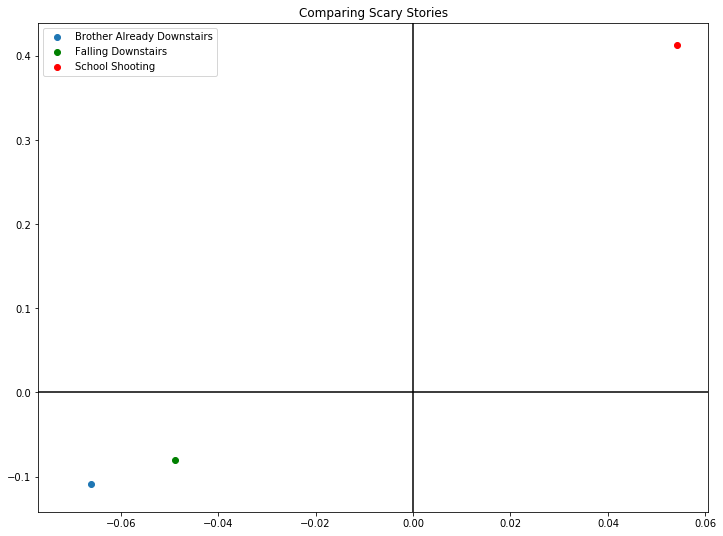

In [91]:
# graph 2 similar points and one different
points = pcaPoints[44], pcaPoints[82], pcaPoints[165]
fig, ax = plt.subplots(figsize=(12,9))

plt.scatter(points[0][0], points[0][1], label='Brother Already Downstairs')
plt.scatter(points[1][0], points[1][1], c='g', label='Falling Downstairs')
plt.scatter(points[2][0], points[2][1], c='r', label='School Shooting')
plt.legend()
plt.title('Comparing Scary Stories')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')